### Part A

In [16]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
#Import data file and verify
df=pd.read_csv('CE802_P2_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0,4.40510,16004.16,1,-11645.820,...,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,NaN,False
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0,4.54500,16041.48,1,-9759.420,...,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,NaN,True
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0,3.59962,16422.78,0,-10775.220,...,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,NaN,False
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0,3.56675,16270.04,1,-9416.714,...,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,NaN,False
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1,5.07000,16548.78,1,-9797.820,...,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,NaN,True


In [18]:
#Check the data shape
df.shape

(1000, 22)

In [19]:
#Check the missing values
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
F16        0
F17        0
F18        0
F19        0
F20        0
F21      500
Class      0
dtype: int64

In [20]:
#Checking mean of values in F21 column
df['F21'].mean()

-10.183520000000003

In [21]:
#Using the method of eliminating rows containing null values would have deleted 500 rows which is almost 50 percent of data . So another imputation method is used.
#Using 'Replace with mean value' imputation method 
df.fillna((df['F21'].mean()),inplace=True)

In [22]:
#Recheck for null values
df.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
F16      0
F17      0
F18      0
F19      0
F20      0
F21      0
Class    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1000 non-null   float64
 1   F2      1000 non-null   float64
 2   F3      1000 non-null   float64
 3   F4      1000 non-null   float64
 4   F5      1000 non-null   float64
 5   F6      1000 non-null   int64  
 6   F7      1000 non-null   float64
 7   F8      1000 non-null   float64
 8   F9      1000 non-null   int64  
 9   F10     1000 non-null   float64
 10  F11     1000 non-null   float64
 11  F12     1000 non-null   float64
 12  F13     1000 non-null   float64
 13  F14     1000 non-null   float64
 14  F15     1000 non-null   float64
 15  F16     1000 non-null   float64
 16  F17     1000 non-null   float64
 17  F18     1000 non-null   float64
 18  F19     1000 non-null   float64
 19  F20     1000 non-null   float64
 20  F21     1000 non-null   float64
 21  Class   1000 non-null   bool   
dtypes

In [68]:
#Convert all data types in float
df['F6'] = df.F6.astype('float64')
df['F9'] = df.F9.astype('float64')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
0,-28703.964,0.73,-4.051752,-6.99630,1473.45,0.0,4.40510,16004.16,1.0,-11645.820,...,-13.735,5.9854,14.24730,1.4892,9959.04,-3199.35,6.8670,-4850.82,-10.18352,0.0
1,-28726.730,1.73,-5.153000,-4.27404,783.15,0.0,4.54500,16041.48,1.0,-9759.420,...,-5.171,4.6222,14.99820,3.1206,10107.44,-3064.95,9.4710,378.78,-10.18352,1.0
2,-28717.120,0.73,-8.440000,-8.25900,2573.95,0.0,3.59962,16422.78,0.0,-10775.220,...,-38.650,4.4096,17.79000,1.9818,10971.04,-3638.85,2.0373,-5215.48,-10.18352,0.0
3,-81470.290,0.73,-4.386600,-5.57460,1499.68,0.0,3.56675,16270.04,1.0,-9416.714,...,-8.639,8.5080,12.98424,11.5620,9681.10,724.95,2.0220,-4378.42,-10.18352,0.0
4,-28750.800,1.73,-4.650200,-4.33848,1409.15,1.0,5.07000,16548.78,1.0,-9797.820,...,-14.730,5.5188,13.57260,2.5440,10965.64,-2607.15,4.3140,-1919.22,-10.18352,1.0


<AxesSubplot:title={'center':'Plot 3'}, ylabel='Frequency'>

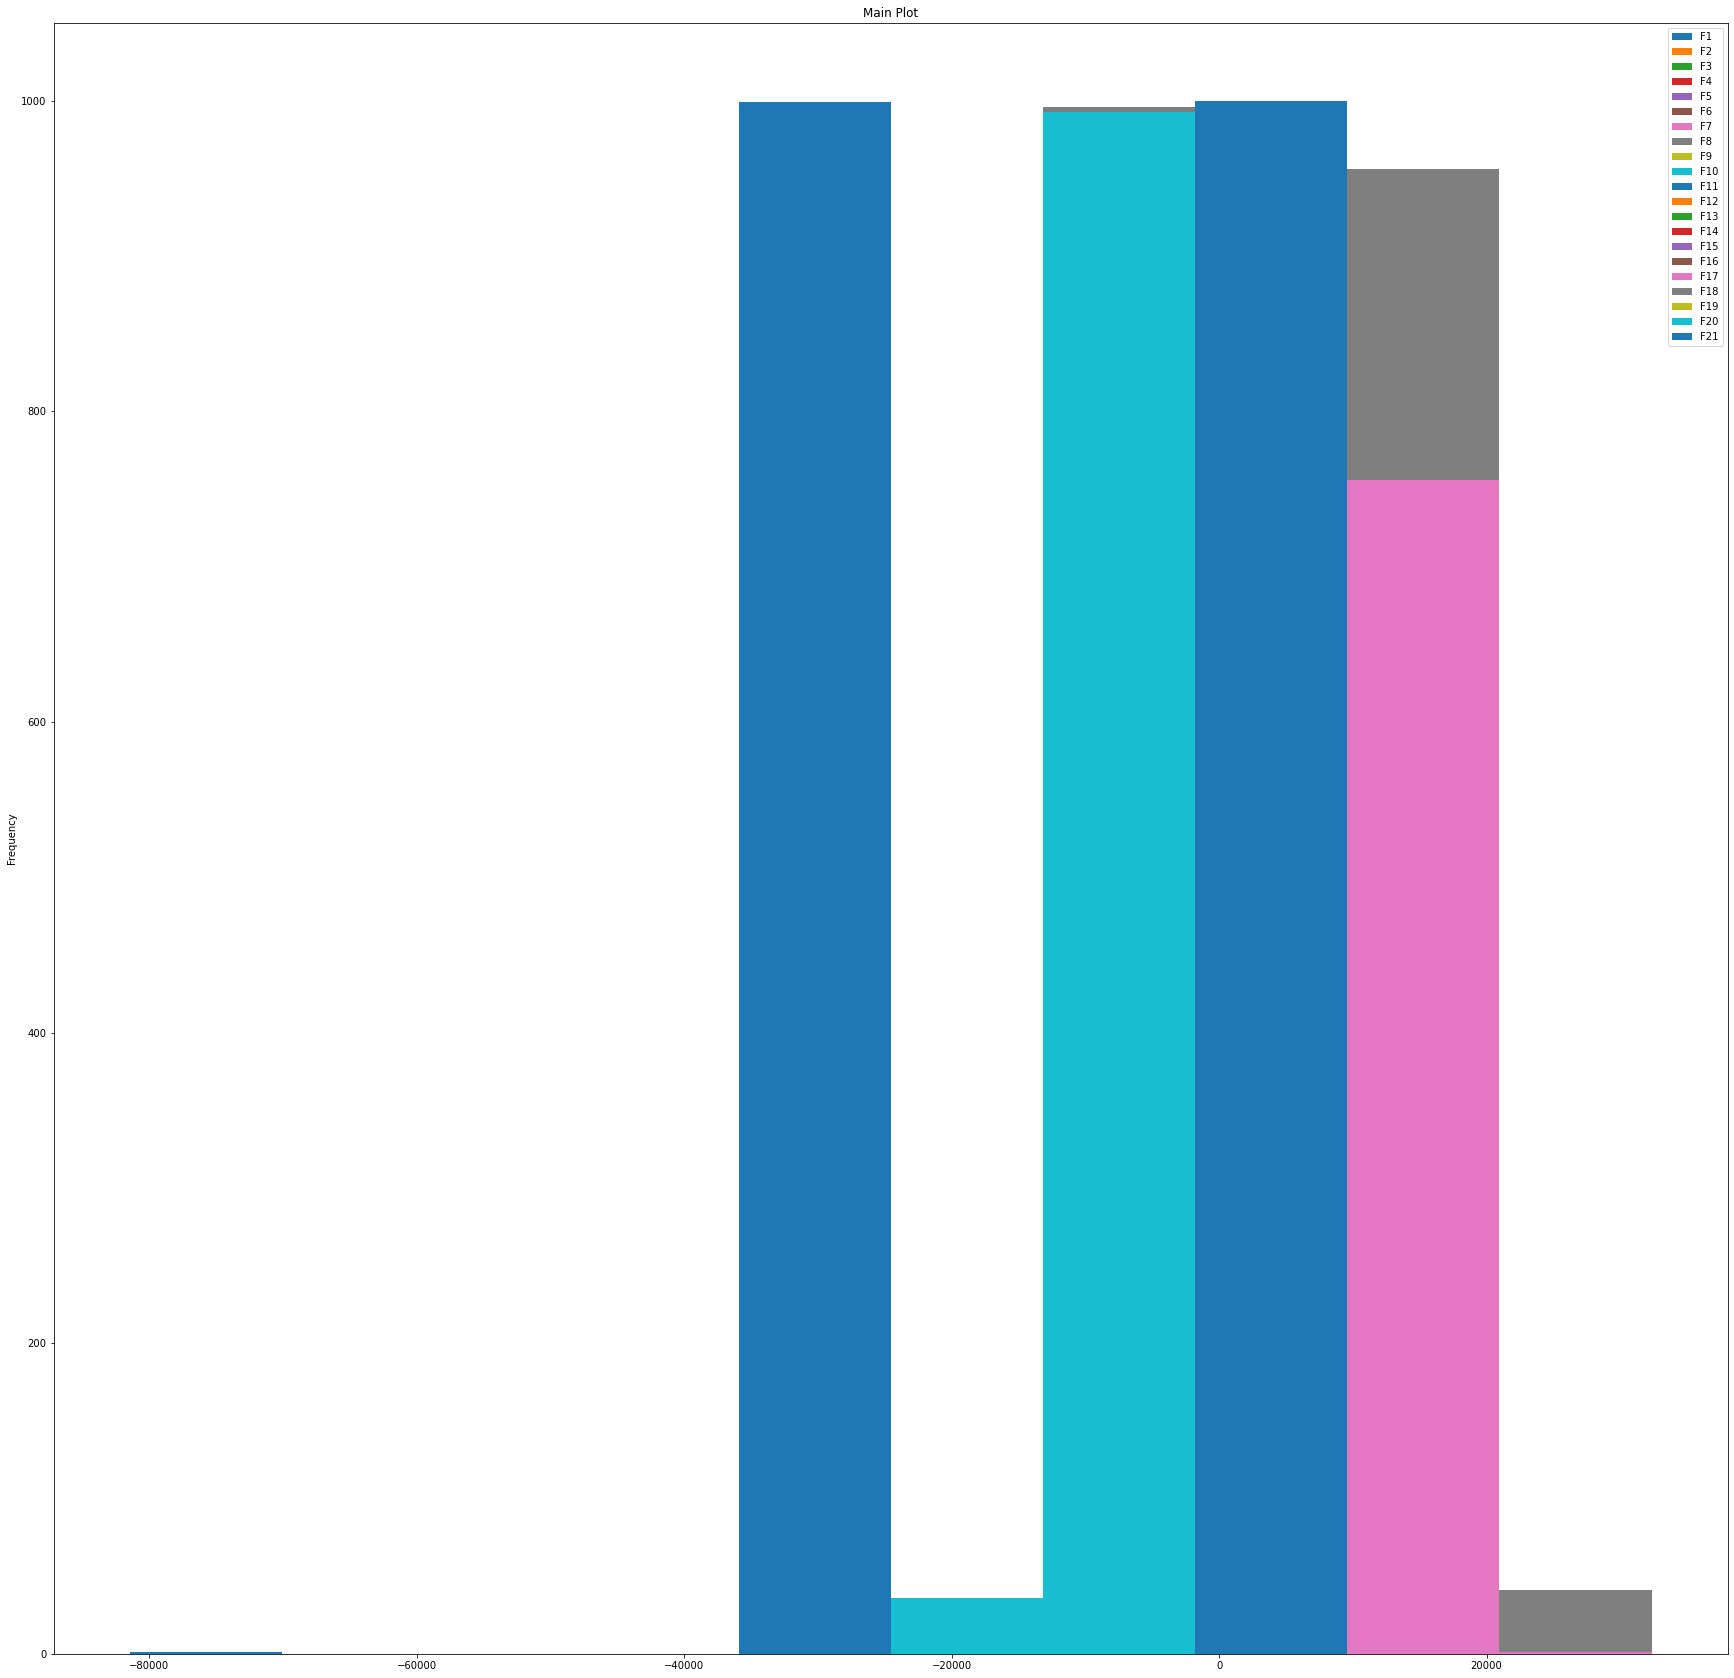

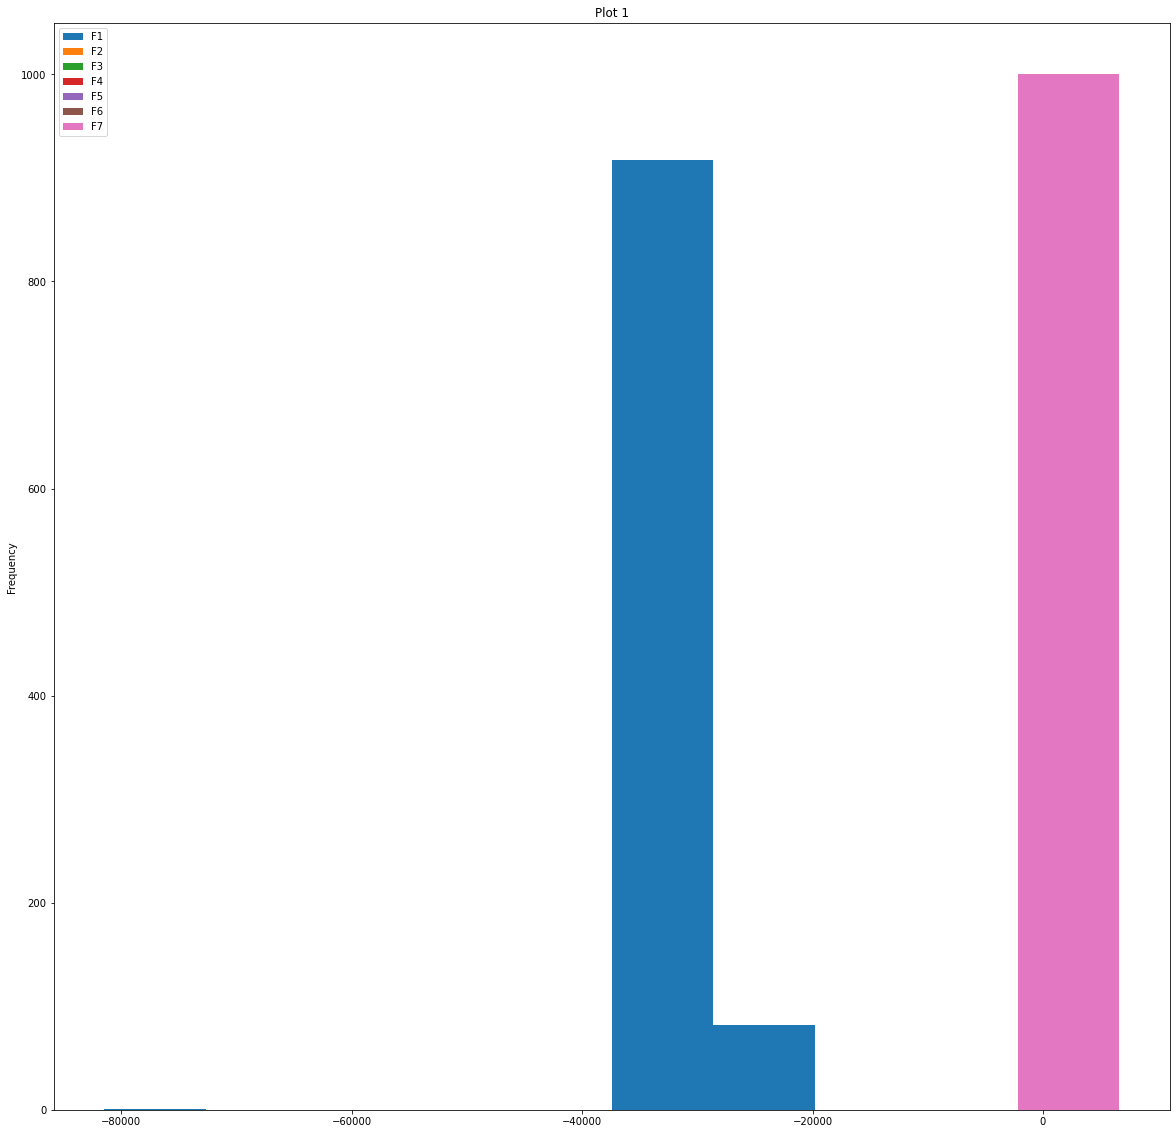

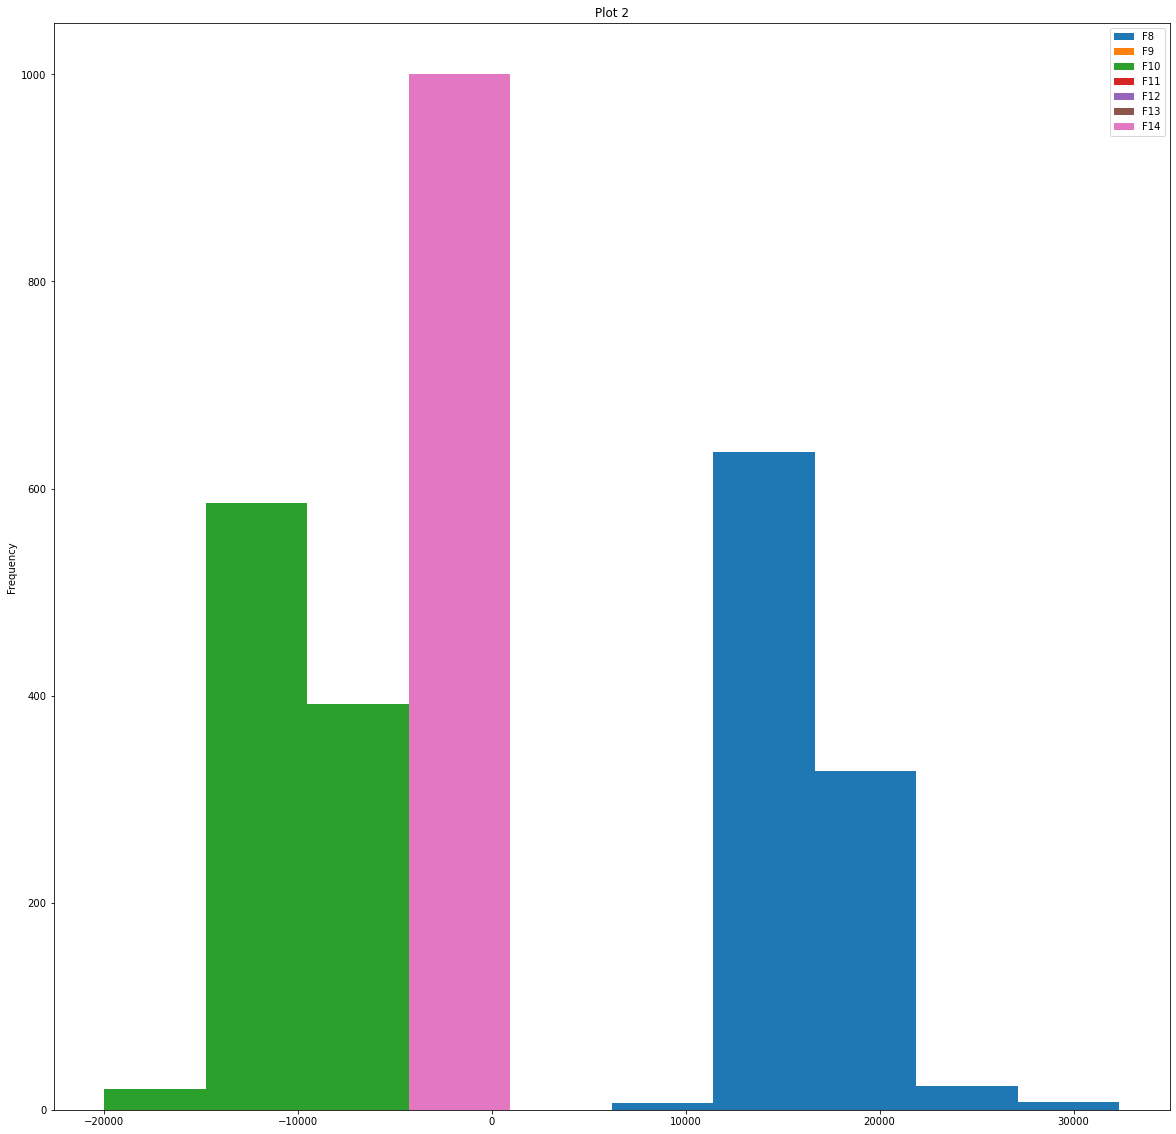

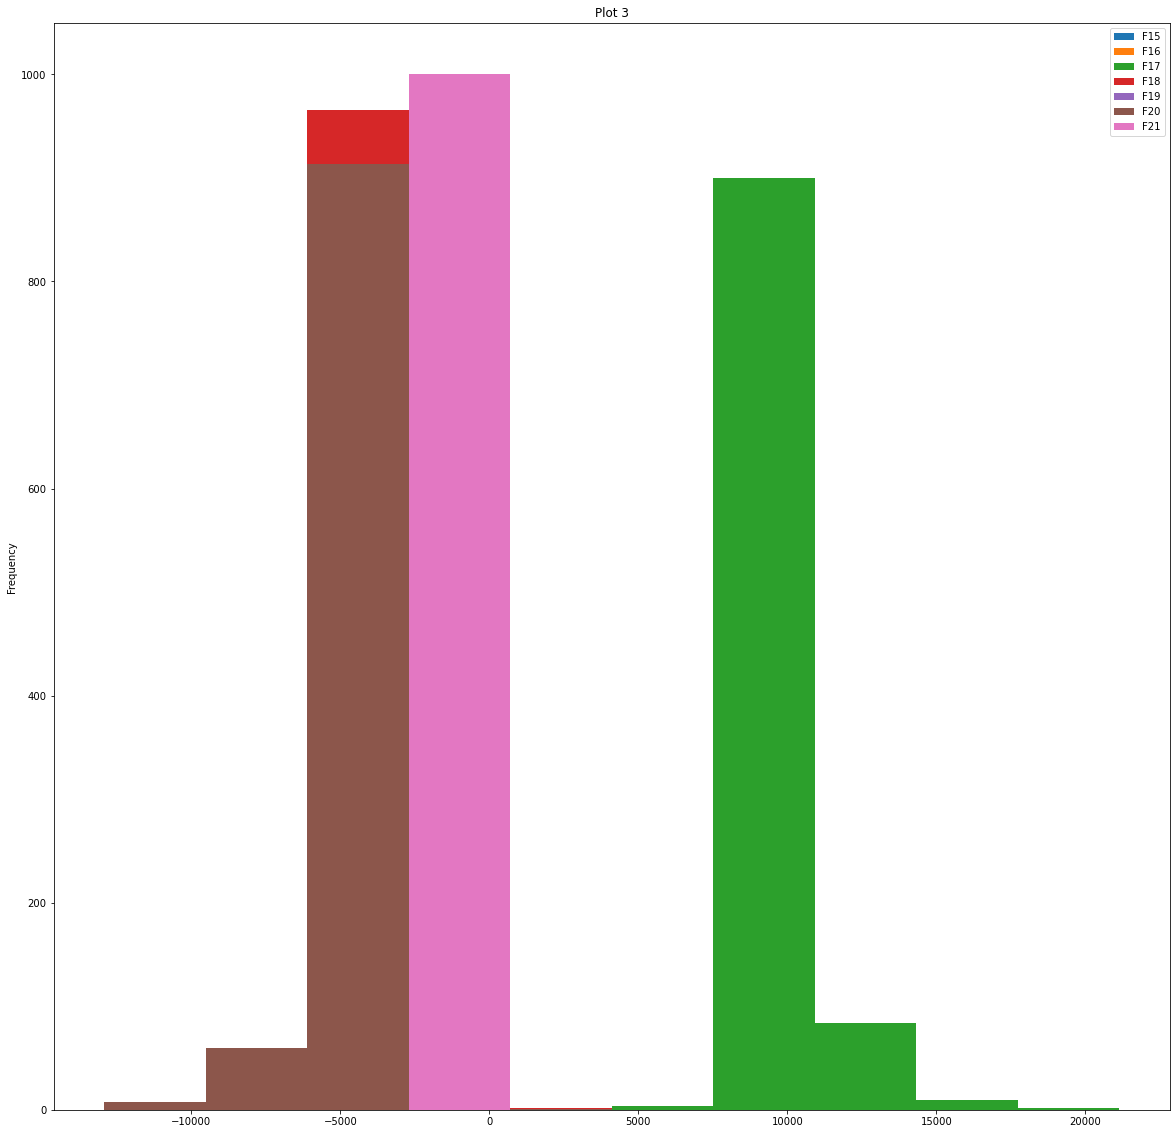

In [69]:
#Relations of features with class
df.plot(x="Class",y=["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16","F17","F18","F19","F20","F21"],kind="hist",figsize=(30,30),title="Main Plot")

df.plot(x="Class",y=["F1","F2","F3","F4","F5","F6","F7"],kind="hist",figsize=(20,20),title="Plot 1")

df.plot(x="Class",y=["F8","F9","F10","F11","F12","F13","F14"],kind="hist",figsize=(20,20),title="Plot 2")

df.plot(x="Class",y=["F15","F16","F17","F18","F19","F20","F21"],kind="hist",figsize=(20,20),title="Plot 3")


In [70]:
#Separating input and output features
features=df.drop(['Class'],axis=1)
target_var=df['Class']


In [71]:
#Get overall description of the dataframe
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,-28749.730710,1.259000,-5.008527,-7.073618,1787.391510,0.507000,4.314597,16794.708266,0.481000,-10014.212102,...,-13.932299,6.097217,15.932875,4.033075,9994.592611,-3750.649178,3.255798,-5066.909169,-10.18352,0.506000
std,1688.229804,0.499408,1.343875,2.708288,702.890861,0.500201,0.614178,2074.355688,0.499889,1494.941683,...,10.285697,1.802407,2.708330,2.609035,1058.036210,739.616151,2.699756,1023.164795,0.75110,0.500214
min,-81470.290000,0.730000,-15.676000,-17.676000,-1942.650000,0.000000,3.540592,7679.980000,0.000000,-19975.820000,...,-85.560000,4.225980,12.966360,1.266660,3700.240000,-8521.050000,0.334140,-12915.220000,-13.62000,0.000000
25%,-28720.400000,0.730000,-5.319050,-8.262750,1506.272500,0.000000,3.827700,15994.420000,0.000000,-10175.920000,...,-16.732500,4.743650,13.852350,2.079975,9584.540000,-3791.062500,1.150725,-5335.020000,-10.18352,0.000000
50%,-28701.070500,1.730000,-4.507200,-6.221100,1649.040000,1.000000,4.180750,16381.580000,0.000000,-9636.920000,...,-10.862000,5.534500,15.096750,3.267150,9755.930000,-3589.140000,2.384400,-5044.997000,-10.18352,1.000000
75%,-28682.255000,1.730000,-4.127370,-5.059425,1880.725000,1.000000,4.694500,17021.730000,1.000000,-9383.513500,...,-6.972000,6.834000,17.170500,5.188500,10066.240000,-3489.926250,4.704750,-4795.820000,-10.13750,1.000000
max,-24983.290000,1.730000,-4.040002,-4.206600,6602.350000,1.000000,7.081000,32339.980000,1.000000,-1929.820000,...,-3.782328,13.330000,26.424000,14.805000,21124.240000,1171.950000,13.536000,1892.780000,-6.81000,1.000000


# Decision Tree Classifier

In [72]:
#Splitting the data in training and testing set
x_train,x_test,y_train,y_test=train_test_split(features,target_var,test_size=0.20,random_state=1)#80 % training and 20 % testing

In [73]:
#Creating the Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)


In [74]:
#Use classifier to predict y using x of testing data set
y_predict=dtc.predict(x_test)

In [75]:
#check model accuracy
print("Accuracy of decision tree classifier is : ",metrics.accuracy_score(y_test,y_predict))
print("Number of mislabeled points out of a total %d points : %d"
% (x_test.shape[0], (y_test != y_predict).sum()))

Accuracy of decision tree classifier is :  0.84
Number of mislabeled points out of a total 200 points : 32


# Random Forest Classifier

In [76]:
xr_train,xr_test,yr_train,yr_test=train_test_split(features,target_var,test_size=0.2,random_state=1)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=155)
rfc.fit(xr_train,yr_train)

RandomForestClassifier(n_estimators=155)

In [78]:
yr_predict=rfc.predict(xr_test)

In [79]:
print("Accuracy of random Classifier is :",metrics.accuracy_score(yr_test,yr_predict))
print("Number of mislabeled points out of a total %d points : %d"
% (xr_test.shape[0], (yr_test != yr_predict).sum()))

Accuracy of random Classifier is : 0.91
Number of mislabeled points out of a total 200 points : 18


# Support Vector Machine (SVM) Classifier

In [80]:
xs_train,xs_test,ys_train,ys_test=train_test_split(features,target_var,test_size=0.2,random_state=1)

In [81]:
from sklearn import svm
svmc=svm.SVC(kernel='linear')
svmc.fit(xs_train,ys_train)


SVC(kernel='linear')

In [82]:
svm_predict=svmc.predict(xs_test)

In [83]:
#Checking accuracy of model
print("Accuracy of SVM Classifier is :",metrics.accuracy_score(ys_test,svm_predict))
print("Number of mislabeled points out of a total %d points : %d"
% (xs_test.shape[0], (ys_test != svm_predict).sum()))

Accuracy of SVM Classifier is : 0.715
Number of mislabeled points out of a total 200 points : 57


# Naive Bayes Classifier

In [84]:
xn_train,xn_test,yn_train,yn_test=train_test_split(features,target_var,test_size=0.2,random_state=1)

#Building a Naive bayes model
from sklearn.naive_bayes import GaussianNB
GC=GaussianNB()
GC.fit(xn_train,yn_train)

#Predicting y using x of test data set
NB_predict=GC.predict(xn_test)
NB_predict

#Checking accuracy of model
print("Accuracy of Naive Bayes Classifier is :",metrics.accuracy_score(yn_test,NB_predict))
print("Number of mislabeled points out of a total %d points : %d"
% (xn_test.shape[0], (yn_test != NB_predict).sum()))



Accuracy of Naive Bayes Classifier is : 0.705
Number of mislabeled points out of a total 200 points : 59


# Confusion Matrix for Decision Tree Classifier

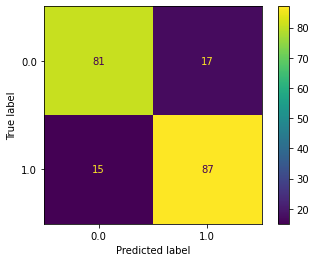

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, x_test, y_test)
plt.show()

# Confusion matrix for Random Forest Classifier

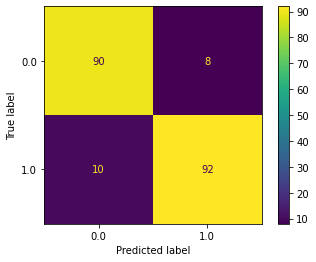

In [86]:
plot_confusion_matrix(rfc, xr_test, yr_test)
plt.show()

# Confusion matrix for SVM Classifier

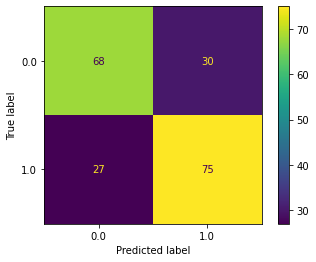

In [87]:
plot_confusion_matrix(svmc, xs_test, ys_test)
plt.show()

# Confusion Matrix for Naive Bayes Classifier

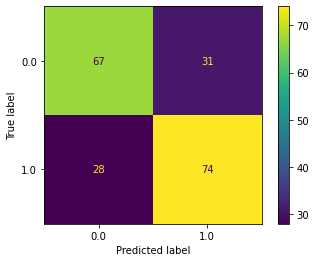

In [88]:
plot_confusion_matrix(GC, xn_test, yn_test)
plt.show()

In [89]:
from sklearn.metrics import f1_score
print("f1-score of Decision Tree Classifier is : ",(f1_score(y_test, y_predict, average='micro')))
print("f1-score of Random Forest Classifier is : ",(f1_score(yr_test, yr_predict, average='micro')))
print("f1-score of SVM Classifier is : ",(f1_score(ys_test, svm_predict, average='micro')))
print("f1-score of Naive Bayes Classifier is : ",(f1_score(yn_test, NB_predict, average='micro')))

f1-score of Decision Tree Classifier is :  0.8399999999999999
f1-score of Random Forest Classifier is :  0.91
f1-score of SVM Classifier is :  0.715
f1-score of Naive Bayes Classifier is :  0.705


In [56]:
#Accuracy and f1 score of Random forest classifier is highest so for Part B we have considered Random Forest classfier

### Part B

In [247]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P2_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data.isnull().sum()
test_data['F21'].mean()
test_data.fillna((test_data['F21'].mean()),inplace=True)
test_data.isnull().sum()

predicted = rfc.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P2_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test_Predictions.csv').iloc[:,:-1])